In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('E:\PROJECTS\Project For Resume\House Rental in canada\Housing.csv')
df2 = pd.read_csv('E:\PROJECTS\Project For Resume\House Rental in canada\kijiji_rental_ads_4106.csv')
df3 = pd.read_csv('E:\PROJECTS\Project For Resume\House Rental in canada\HouseListings-Top45Cities-10292023-kaggle.csv')
df4 = pd.read_csv(r'E:\PROJECTS\Project For Resume\House Rental in canada\rentfaster.csv')
df5 = pd.read_csv('E:\PROJECTS\Project For Resume\House Rental in canada\ca_real_estate.csv')
df6 = pd.read_csv(r'E:\PROJECTS\Project For Resume\House Rental in canada\Unemployment_Canada_1976_present.csv')
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())
print(df6.head())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [32]:
# Check for missing values in the dataset
# print(df1.isnull().sum())
print(df2.isnull().sum())
# print(df3.isnull().sum())
print(df4.isnull().sum())
# print(df5.isnull().sum())
# print(df.isnull().sum())

Title                        7
Price($)                   256
Address                     12
Date Posted                608
Building Type             1025
Bedrooms                  1025
Bathrooms                 1025
Utilities                 1968
Wi-Fi and More            1025
Parking Included          1025
Agreement Type            1025
Move-In Date              2098
Pet Friendly               347
Size (sqft)               1023
Furnished                   47
Air Conditioning          1025
Personal Outdoor Space    1025
Smoking Permitted         1025
Appliances                1535
Amenities                 2510
Description                186
Visit Counter             1677
url                          0
dtype: int64
rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths         

In [4]:

# Set the threshold
threshold = 1500

# Drop columns with missing values greater than the threshold
df2 = df2.loc[:, df2.isnull().sum() <= threshold]
print(df2.isnull().sum())


Title                        7
Price($)                   256
Address                     12
Date Posted                608
Building Type             1025
Bedrooms                  1025
Bathrooms                 1025
Wi-Fi and More            1025
Parking Included          1025
Agreement Type            1025
Pet Friendly               347
Size (sqft)               1023
Furnished                   47
Air Conditioning          1025
Personal Outdoor Space    1025
Smoking Permitted         1025
Description                186
url                          0
dtype: int64


In [7]:
numerical_cols = df2.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
categorical_cols = df2.select_dtypes(include=['object']).columns
print(categorical_cols)

print(df2['Price($)'].dtype) #identify the data type of the column

df2['Price($)'].fillna(df2['Price($)'].mean(), inplace=True) #fill the missing value 

print(df2['Price($)'].isnull().sum())  # Should return 0

# List of categorical columns
categorical_columns = [
    'Title', 'Address', 'Date Posted', 'Building Type', 'Bedrooms',
    'Bathrooms', 'Wi-Fi and More', 'Parking Included', 'Agreement Type',
    'Pet Friendly', 'Size (sqft)', 'Furnished', 'Air Conditioning',
    'Personal Outdoor Space', 'Smoking Permitted', 'Description', 'url'
]

# Fill missing values for each categorical column
for column in categorical_columns:
    df2[column].fillna(df2[column].mode()[0], inplace=True)

# Check if the missing values are filled for all columns
for column in categorical_columns:
    print(f"Missing values in {column} after filling:", df2[column].isnull().sum())
    




Index(['Price($)'], dtype='object')
Index(['Title', 'Address', 'Date Posted', 'Building Type', 'Bedrooms',
       'Bathrooms', 'Wi-Fi and More', 'Parking Included', 'Agreement Type',
       'Pet Friendly', 'Size (sqft)', 'Furnished', 'Air Conditioning',
       'Personal Outdoor Space', 'Smoking Permitted', 'Description', 'url'],
      dtype='object')
float64
0
Missing values in Title after filling: 0
Missing values in Address after filling: 0
Missing values in Date Posted after filling: 0
Missing values in Building Type after filling: 0
Missing values in Bedrooms after filling: 0
Missing values in Bathrooms after filling: 0
Missing values in Wi-Fi and More after filling: 0
Missing values in Parking Included after filling: 0
Missing values in Agreement Type after filling: 0
Missing values in Pet Friendly after filling: 0
Missing values in Size (sqft) after filling: 0
Missing values in Furnished after filling: 0
Missing values in Air Conditioning after filling: 0
Missing values in Person

In [8]:
# Check for missing values in the entire DataFrame
missing_values = df2.isnull().sum()
print(missing_values)

Title                     0
Price($)                  0
Address                   0
Date Posted               0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Description               0
url                       0
dtype: int64


In [9]:
missing_values = df4.isnull().sum()
print(missing_values)

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64


In [11]:
# Set the threshold
threshold = 4000

# Drop columns with missing values greater than the threshold
df4 = df4.loc[:, df4.isnull().sum() <= threshold]
print(df4.isnull().sum())

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64


In [12]:
numerical_cols = df4.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
categorical_cols = df4.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['rentfaster_id', 'latitude', 'longitude', 'price'], dtype='object')
Index(['city', 'province', 'address', 'lease_term', 'type', 'beds', 'baths',
       'link', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')


In [16]:
# Identify columns with missing values
missing_columns = df4.columns[df4.isnull().sum() > 0]

# Display data types of the columns with missing values
print("Data types of columns with missing values:")
print(df4[missing_columns].dtypes)

Data types of columns with missing values:
address              object
lease_term           object
beds                 object
baths                object
availability_date    object
smoking              object
cats                 object
dogs                 object
dtype: object


In [17]:
# Fill missing values for all object (categorical) columns
for column in df4.columns[df4.isnull().sum() > 0]:
    # Fill with the most common value (mode)
    df4[column].fillna(df4[column].mode()[0], inplace=True)

# Verify if all missing values are filled
print("Remaining missing values after filling:")
print(df4.isnull().sum().sum())


Remaining missing values after filling:
0


In [19]:
# Check for missing values in the dataset
# print(df1.isnull().sum())
# print(df2.isnull().sum())
# print(df3.isnull().sum())
# print(df4.isnull().sum())
# print(df5.isnull().sum())
print(df6.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Title                     0
Price($)                  0
Address                   0
Date Posted               0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Description               0
url                       0
dtype: int64
City                    0
Price                   0
Address            

In [20]:
# Identify columns with missing values
missing_columns = df6.columns[df6.isnull().sum() > 0]

# Display data types of the columns with missing values
print("Data types of columns with missing values:")
print(df6[missing_columns].dtypes)

Data types of columns with missing values:
Full-time employment     float64
Part-time employment     float64
Unemployment             float64
Unemployment rate        float64
dtype: object


In [30]:
# Fill missing values with the mean for all float64 columns
for column in df6.select_dtypes(include='float64').columns:
    df6[column].fillna(df6[column].mean(), inplace=True)

# Verify if all missing values are filled
print("Remaining missing values after filling:")
print(df6.isnull().sum().sum())


Remaining missing values after filling:
0


In [31]:
# Check for missing values in the dataset
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())
print(df6.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Title                     0
Price($)                  0
Address                   0
Date Posted               0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Description               0
url                       0
dtype: int64
City                    0
Price                   0
Address            

In [32]:
# Save each cleaned DataFrame to a new CSV file
df1.to_csv('cleaned_file1.csv', index=False)
df2.to_csv('cleaned_file2.csv', index=False)
df3.to_csv('cleaned_file3.csv', index=False)
df4.to_csv('cleaned_file4.csv', index=False)
df5.to_csv('cleaned_file5.csv', index=False)
df6.to_csv('cleaned_file6.csv', index=False)


In [33]:
# Verify by loading one file
df6_check = pd.read_csv('cleaned_file1.csv')
print("First 5 rows of cleaned_file1.csv:")
print(df6_check.head())


First 5 rows of cleaned_file1.csv:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr

In [34]:
# List of your DataFrames
dataframes = [df1, df2, df3, df4, df5, df6]

# Loop through each DataFrame to perform Data Validation
for i, df in enumerate(dataframes, 1):
    print(f"Validating df{i}...")
    
    # 1. Convert non-numeric values in numerical columns to NaN
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # 2. Fill NaN values (with mean for numerical columns)
    df.fillna(df.mean(), inplace=True)
    
    # 3. Check if any missing values remain
    missing_values = df.isnull().sum()
    print(f"Missing values in df{i} after filling:")
    print(missing_values)
    
    print("\n---\n")


Validating df1...
Missing values in df1 after filling:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

---

Validating df2...
Missing values in df2 after filling:
Title                     0
Price($)                  0
Address                   0
Date Posted               0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Description             

In [35]:
# Univariate Analysis for Numerical Columns
# Print summary statistics for numerical columns to understand the distribution and central tendencies
print("Descriptive Statistics for Numerical Data:")
print(df1.describe())  # Summary statistics like mean, median, std, min, max, etc

Descriptive Statistics for Numerical Data:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580306e+09  5.400886e+05      3.370795      2.114757   2079.899736   
std    2.876570e+09  3.671268e+05      0.930105      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4

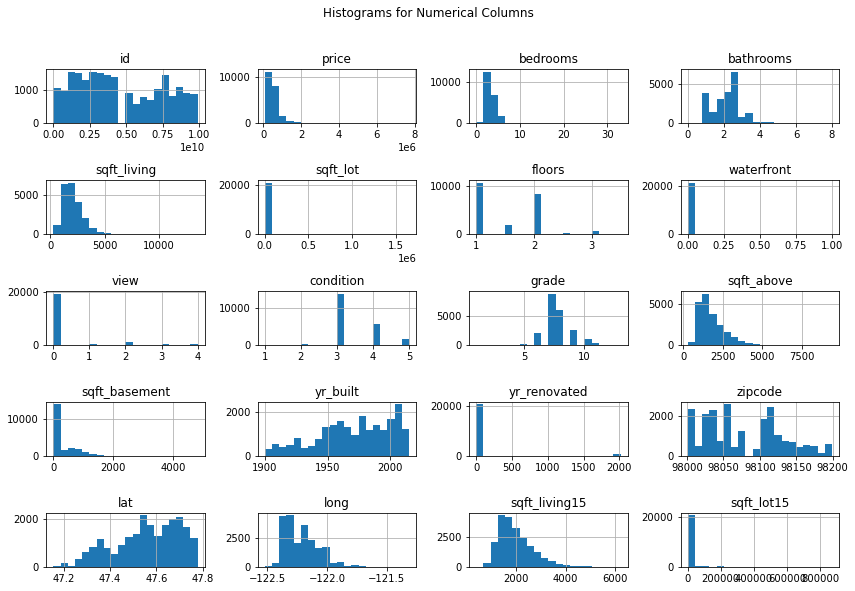

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram for Numerical Data
# Plot histograms for numerical columns to visualize the distribution of values
df1.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(12, 8))  # Plot histogram for all numerical columns
plt.suptitle("Histograms for Numerical Columns", y=1.02)  # Title for the histogram plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the histogram

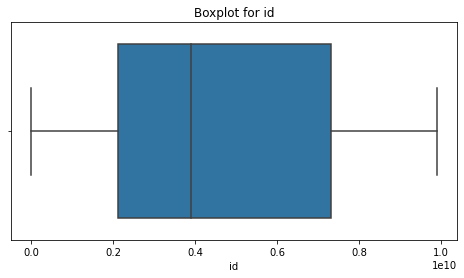

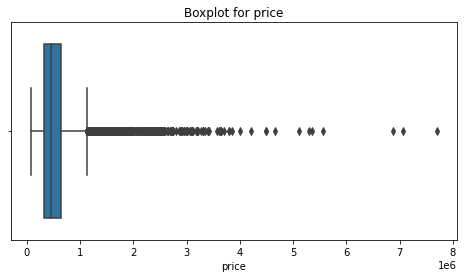

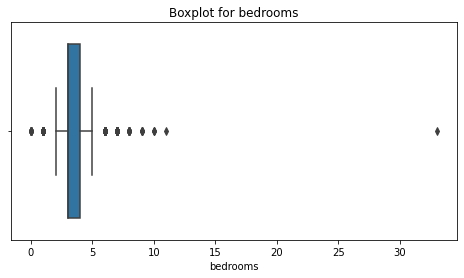

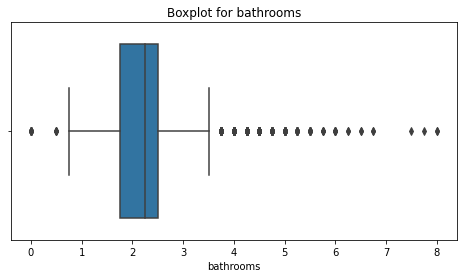

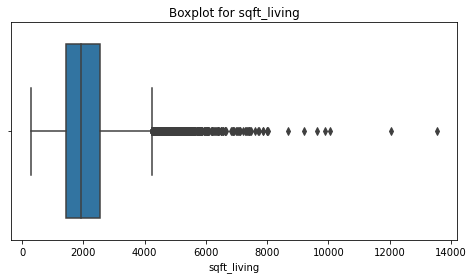

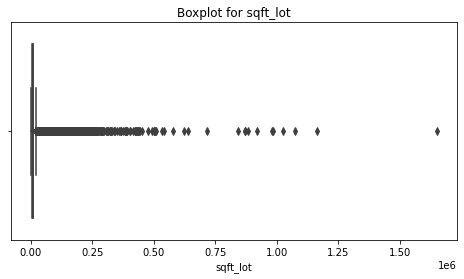

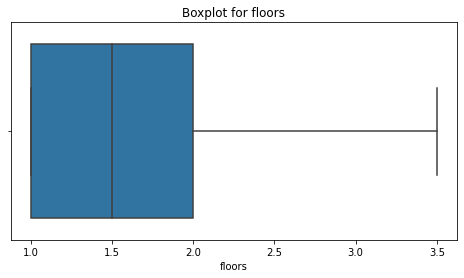

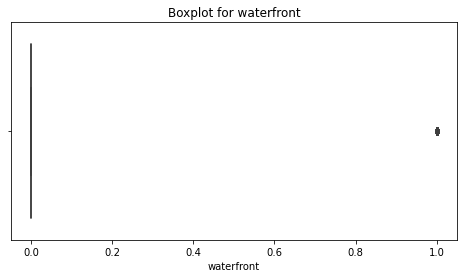

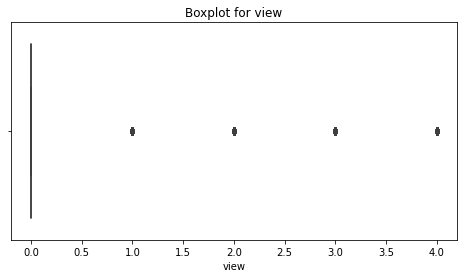

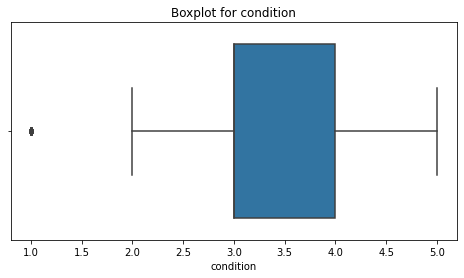

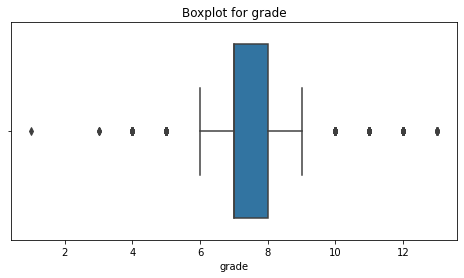

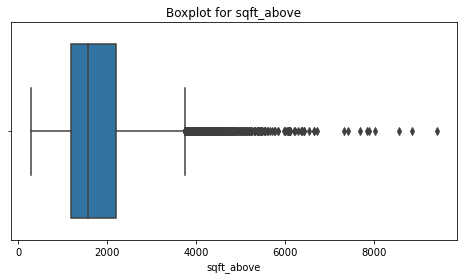

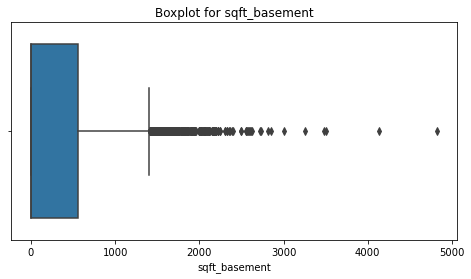

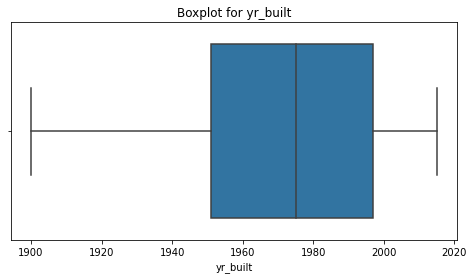

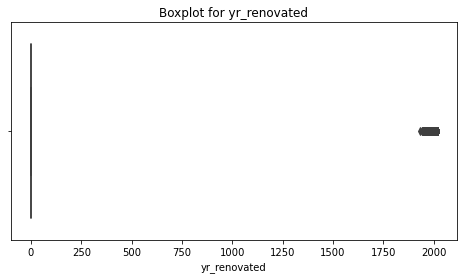

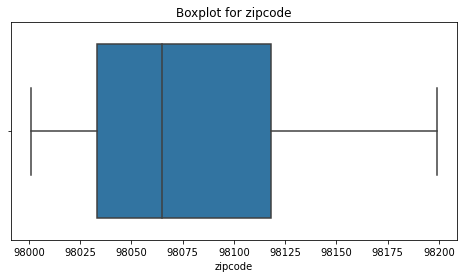

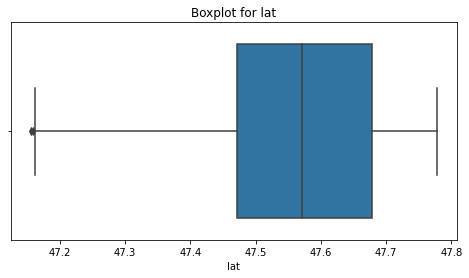

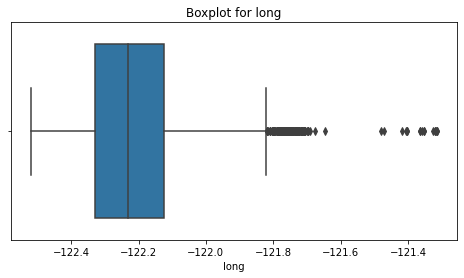

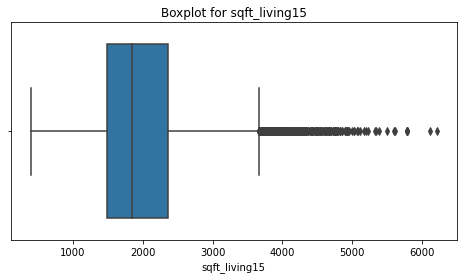

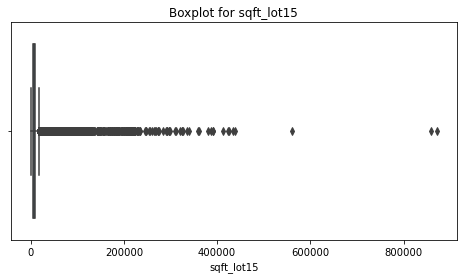

In [40]:
# Boxplots for Numerical Data (Checking for outliers)
# Boxplots are used to visualize the spread and check for any outliers in numerical columns
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns  # Get all numerical column names
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Create a figure for each boxplot
    sns.boxplot(data=df1, x=col)  # Create a boxplot for the column
    plt.title(f"Boxplot for {col}")  # Title of the boxplot
    plt.show()  # Display the boxplot


Value counts for date:
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140517T000000      1
20150215T000000      1
20140830T000000      1
20150527T000000      1
20150308T000000      1
Name: date, Length: 372, dtype: int64


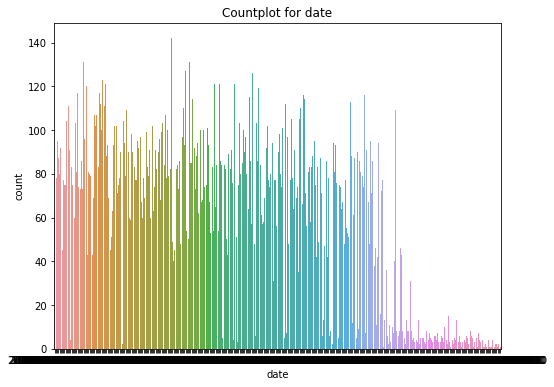

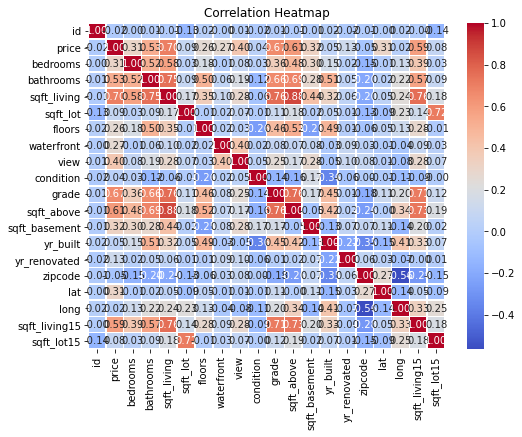

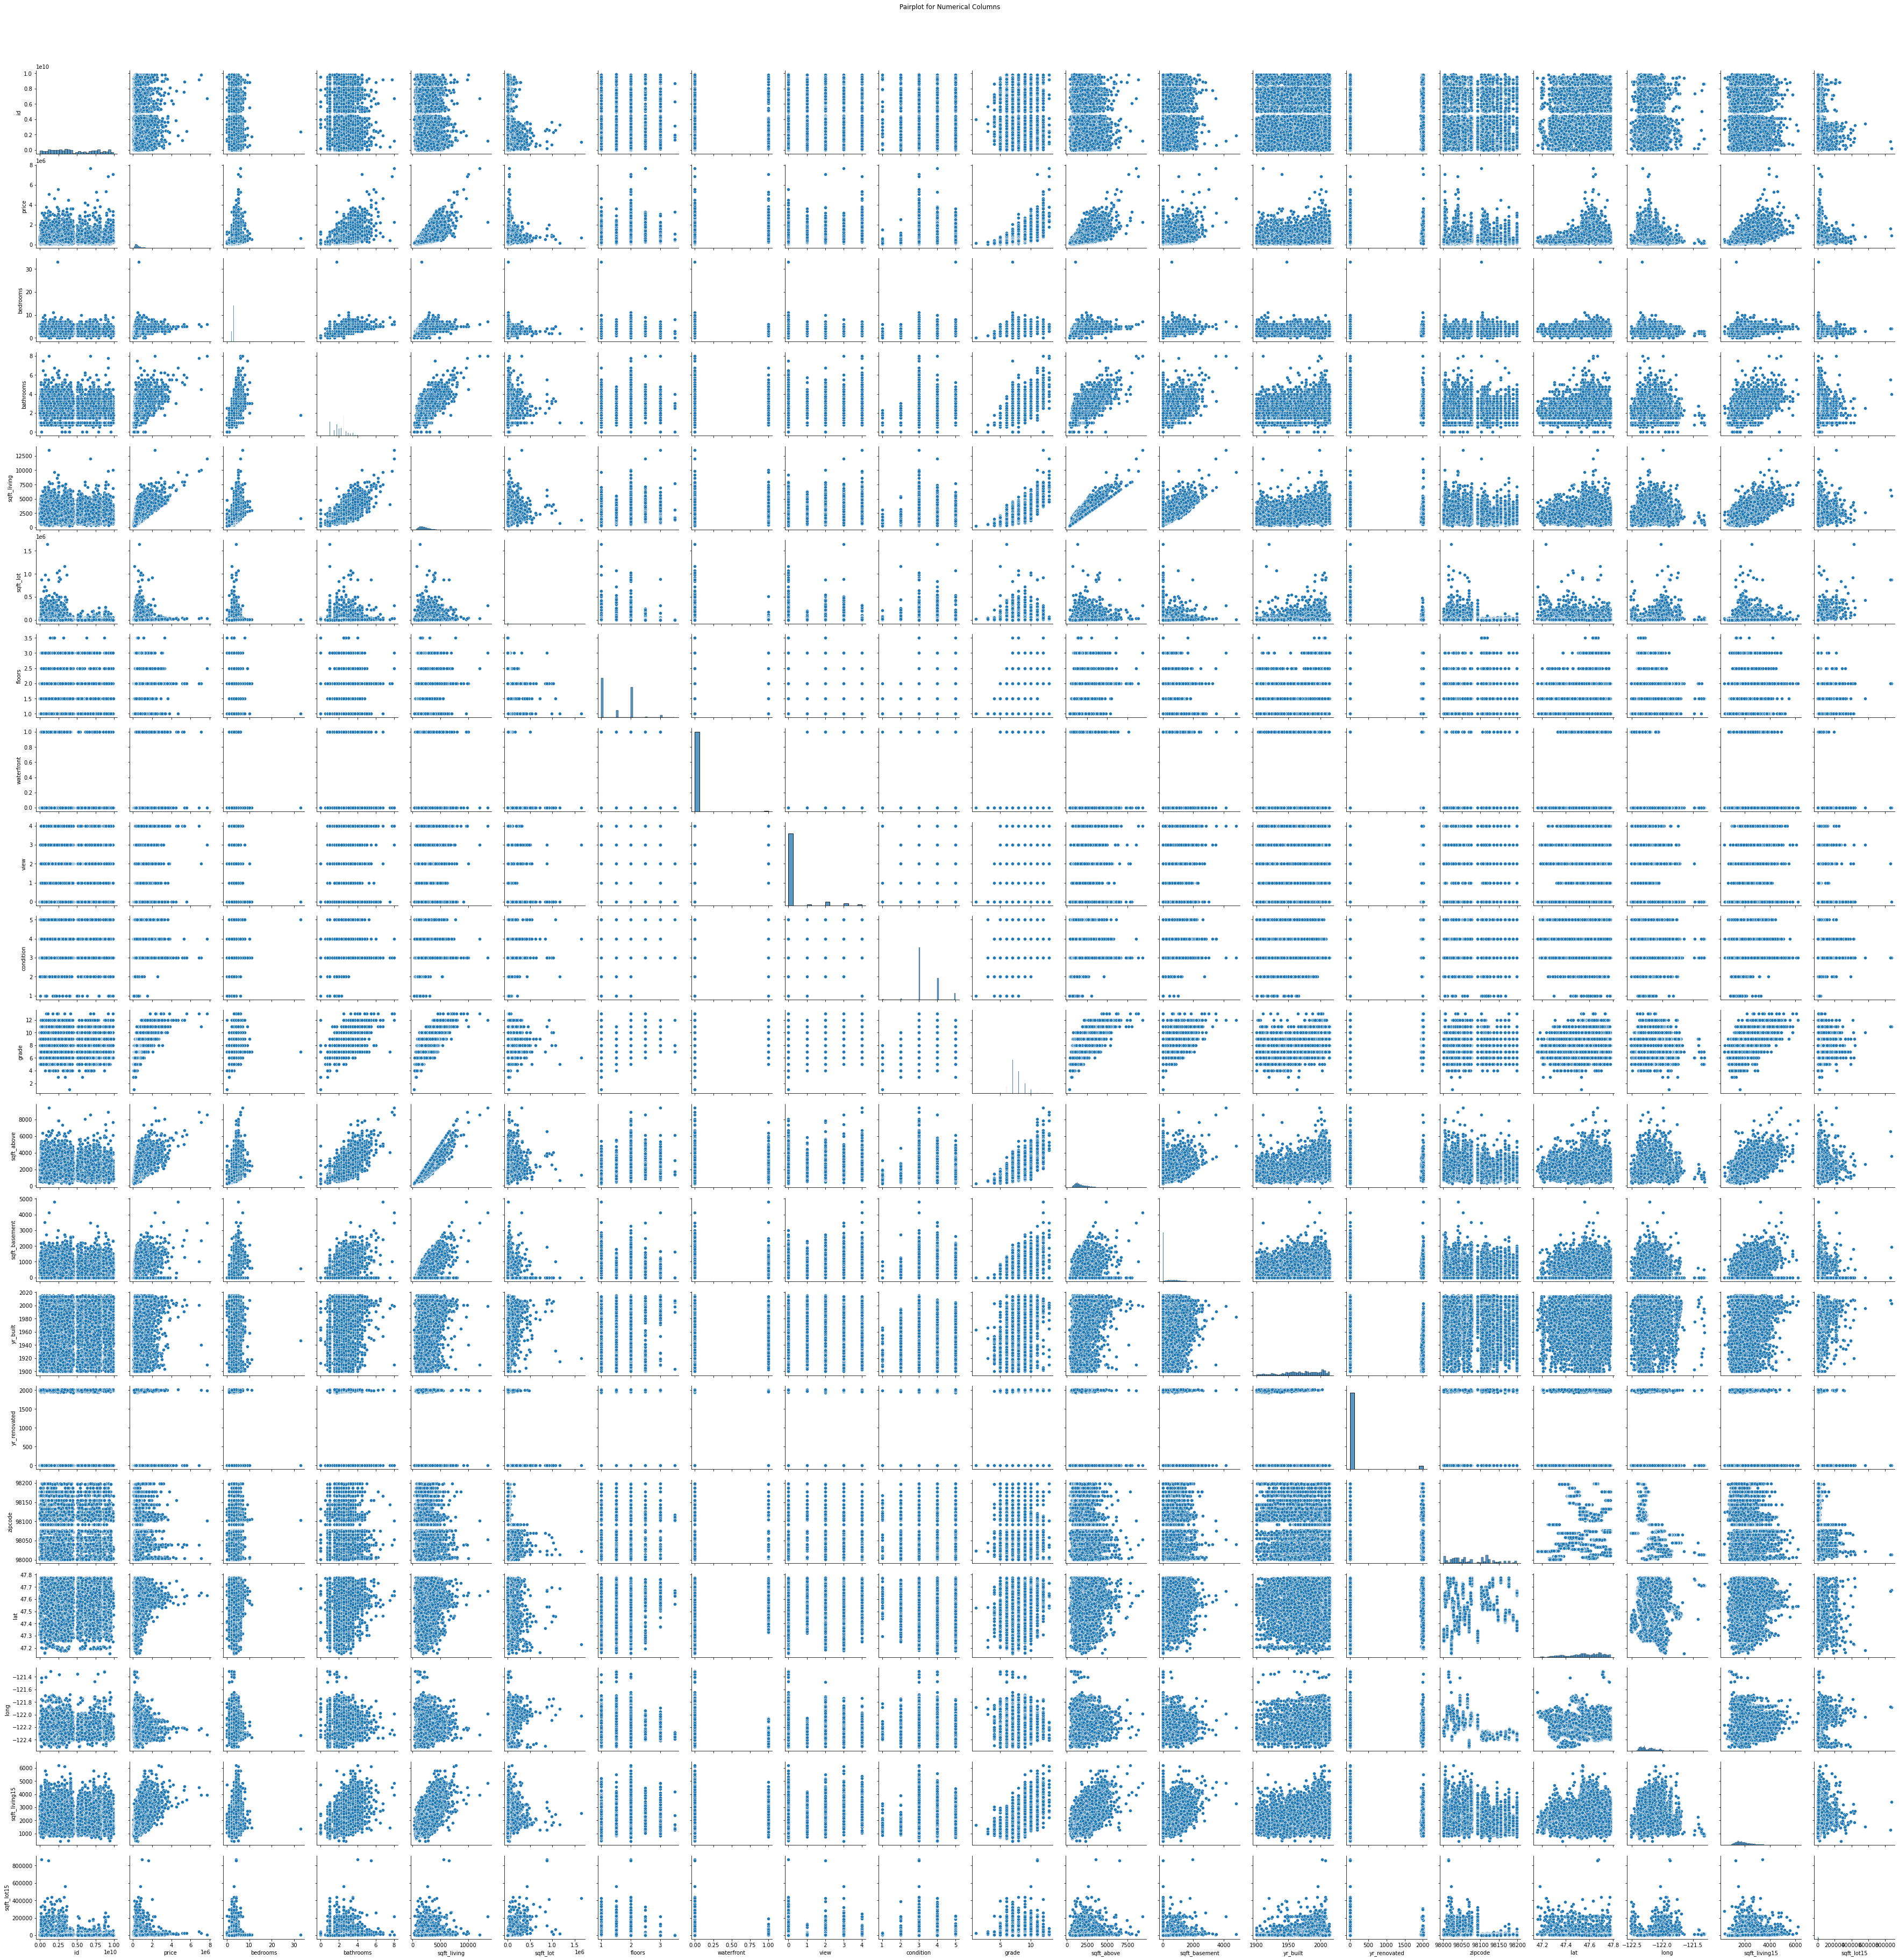

In [41]:
# Univariate Analysis for Categorical Data (Value Counts & Barplots)
# For each categorical column, display the value counts and visualize the distribution using barplots
categorical_cols = df1.select_dtypes(include=['object']).columns  # Get all categorical column names
for col in categorical_cols:
    print(f"\nValue counts for {col}:")  # Print the counts of each unique value in the categorical column
    print(df1[col].value_counts())  # Display the frequency of each category
    plt.figure(figsize=(8, 6))  # Create a figure for each countplot
    sns.countplot(data=df1, x=col)  # Create a bar plot for the categorical column
    plt.title(f"Countplot for {col}")  # Title of the countplot
    plt.show()  # Display the countplot

# Bivariate Analysis (Correlation Heatmap)
# A heatmap to visualize the correlation matrix between numerical variables
plt.figure(figsize=(8, 6))  # Create a figure for the heatmap
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # Create the correlation heatmap
plt.title("Correlation Heatmap")  # Title for the heatmap
plt.show()  # Display the heatmap

# Pairplot for relationships between numerical variables
# A pairplot visualizes pairwise relationships between numerical columns in a scatter plot format
sns.pairplot(df1.select_dtypes(include=['float64', 'int64']))  # Plot pairwise relationships for all numerical columns
plt.suptitle("Pairplot for Numerical Columns", y=1.02)  # Title for the pairplot
plt.show()  # Display the pairplot

In [42]:
import pandas as pd

# Assuming df1 is your DataFrame

# Handle outliers and missing values

# 1. Handle Bedrooms and Bathrooms - Replace 0 values with NaN, and then fill them with median or mode
df1['bedrooms'] = df1['bedrooms'].replace(0, pd.NA)  # Replace 0 with NaN
df1['bathrooms'] = df1['bathrooms'].replace(0, pd.NA)  # Replace 0 with NaN
df1['bedrooms'].fillna(df1['bedrooms'].median(), inplace=True)  # Replace NaN with median
df1['bathrooms'].fillna(df1['bathrooms'].median(), inplace=True)  # Replace NaN with median

# 2. Handle Price - Check if the price is unusually low (e.g., 75,000), and replace it with the median price if needed
df1['price'] = df1['price'].replace(75000, df1['price'].median())  # Replace 75,000 with median price

# 3. Handle Square Footage - Check if the square footage is unusually low (e.g., 290 sqft) and replace it with median or mean
df1['sqft_living'] = df1['sqft_living'].replace(290, df1['sqft_living'].median())  # Replace 290 sqft with median

# 4. Handle Waterfront (binary) - If there are any incorrect values, replace them with valid values (0 or 1)
df1['waterfront'] = df1['waterfront'].replace([2, -1], 0)  # Replace invalid values with 0 (or 1 if needed)

# 5. Handle Year Renovated - Replace 0 values with NaN, and then fill with the median year
df1['yr_renovated'] = df1['yr_renovated'].replace(0, pd.NA)  # Replace 0 with NaN
df1['yr_renovated'].fillna(df1['yr_renovated'].median(), inplace=True)  # Replace NaN with median year

# Now check the descriptive statistics again to verify
print(df1.describe())

# Optionally, save the cleaned DataFrame back to CSV
df1.to_csv('cleaned_df1.csv', index=False)


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580306e+09  5.401059e+05      3.372600      2.115798   2079.974691   
std    2.876570e+09  3.671137e+05      0.926467      0.768823    918.360916   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [43]:
# Check the descriptive statistics to verify the changes after handling outliers
print("Descriptive Statistics After Cleaning:")
print(df1.describe())

# Check specific columns to ensure there are no incorrect values (e.g., price, bedrooms, bathrooms)
print("\nCheck for unusual values in price, bedrooms, and bathrooms:")
print(df1[['price', 'bedrooms', 'bathrooms']].head())

# Check for any remaining missing values
print("\nRemaining missing values:")
print(df1.isnull().sum())

# Optionally, save the cleaned DataFrame again to ensure the changes persist
df1.to_csv('cleaned_df1.csv', index=False)


Descriptive Statistics After Cleaning:
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580306e+09  5.401059e+05      3.372600      2.115798   2079.974691   
std    2.876570e+09  3.671137e+05      0.926467      0.768823    918.360916   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142

In [44]:
# Univariate Analysis for Numerical Columns
# Print summary statistics for numerical columns to understand the distribution and central tendencies
print("Descriptive Statistics for Numerical Data:")
print(df2.describe())  # Summary statistics like mean, median, std, min, max, etc

Descriptive Statistics for Numerical Data:
           Price($)
count  4.106000e+03
mean   2.605814e+03
std    1.789966e+04
min    2.000000e+01
25%    1.700000e+03
50%    2.200000e+03
75%    2.605814e+03
max    1.080000e+06


In [45]:
import pandas as pd

# Assuming df2 is your DataFrame
# Let's first check for any missing values in the 'Price($)' column
print(df2['Price($)'].isnull().sum())  # Check missing values

# 1. Handle Missing Values (if any)
# For this example, let's drop rows with missing price
df2 = df2.dropna(subset=['Price($)'])

# 2. Remove extreme outliers using the IQR method (Interquartile Range)
Q1 = df2['Price($)'].quantile(0.25)
Q3 = df2['Price($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (values outside lower and upper bounds)
df2_cleaned = df2[(df2['Price($)'] >= lower_bound) & (df2['Price($)'] <= upper_bound)]

# 3. Alternatively, cap the extreme outliers (if you prefer capping)
# Here, let's cap values below the 1st percentile and above the 99th percentile
lower_cap = df2['Price($)'].quantile(0.01)  # 1st percentile
upper_cap = df2['Price($)'].quantile(0.99)  # 99th percentile

df2['Price($)'] = df2['Price($)'].clip(lower=lower_cap, upper=upper_cap)

# Verify the cleaning process
print("Descriptive Statistics After Cleaning:")
print(df2['Price($)'].describe())

# Check for any remaining outliers or missing values
print(df2['Price($)'].isnull().sum())  # Check missing values again


0
Descriptive Statistics After Cleaning:
count    4106.000000
mean     2143.309805
std       778.859755
min       419.300000
25%      1700.000000
50%      2200.000000
75%      2605.813506
max      4574.100000
Name: Price($), dtype: float64
0


In [46]:
# Univariate Analysis for Numerical Columns
# Print summary statistics for numerical columns to understand the distribution and central tendencies
print("Descriptive Statistics for Numerical Data:")
print(df3.describe())  # Summary statistics like mean, median, std, min, max, etc

Descriptive Statistics for Numerical Data:
              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.576800e+04  35768.000000  35768.000000  3.576800e+04  35768.000000   
mean   9.432963e+05      3.283661      2.532403  6.360151e+05     47.446556   
std    1.020110e+06      1.730654      1.371910  1.120016e+06      3.333855   
min    2.150000e+04      0.000000      0.000000  6.338200e+04     42.283300   
25%    4.599000e+05      2.000000      2.000000  1.091670e+05     43.866700   
50%    6.990000e+05      3.000000      2.000000  2.424600e+05     49.025000   
75%    1.095000e+06      4.000000      3.000000  5.228880e+05     49.888100   
max    3.700000e+07    109.000000     59.000000  5.647656e+06     53.916900   

          Longitude  Median_Family_Income  
count  35768.000000          35768.000000  
mean     -98.421636          89643.103416  
std       22.280935          12132.353510  
min     -123.936400          62400.000000  
25%     -122.316700      


Cleaned Data Summary:
              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.248300e+04  32483.000000  32483.000000  3.248300e+04  32483.000000   
mean   7.553492e+05      3.223440      2.440507  6.200368e+05     47.439416   
std    4.213817e+05      1.367175      1.085924  1.089331e+06      3.397365   
min    2.150000e+04      1.000000      1.000000  6.338200e+04     42.283300   
25%    4.499000e+05      2.000000      2.000000  1.197850e+05     43.866700   
50%    6.749000e+05      3.000000      2.000000  2.424600e+05     48.428300   
75%    9.590000e+05      4.000000      3.000000  5.228880e+05     49.888100   
max    2.040000e+06     10.000000     10.000000  5.647656e+06     53.916900   

          Longitude  Median_Family_Income  
count  32483.000000           32483.00000  
mean     -97.718556           89772.99255  
std       22.122375           11901.26084  
min     -123.936400           62400.00000  
25%     -120.340800           83000.00000  
5

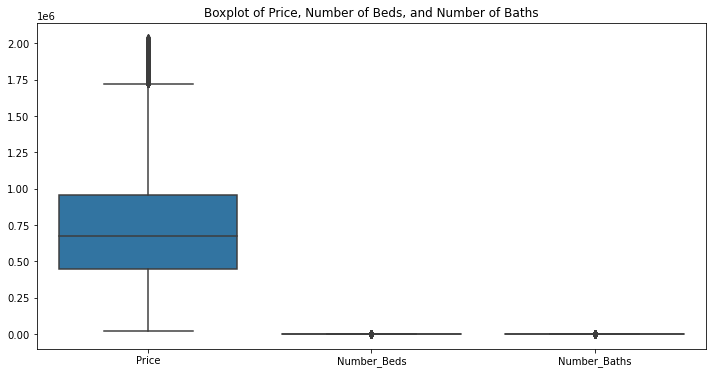

In [47]:
# 1. Handle Price outliers using IQR method
Q1_price = df3['Price'].quantile(0.25)
Q3_price = df3['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Remove outliers in 'Price'
df3 = df3[(df3['Price'] >= lower_bound_price) & (df3['Price'] <= upper_bound_price)]

# 2. Handle outliers for Number_Beds (Assuming no property has more than 10 beds)
df3 = df3[(df3['Number_Beds'] > 0) & (df3['Number_Beds'] <= 10)]

# 3. Handle outliers for Number_Baths (Assuming no property has more than 10 baths)
df3 = df3[(df3['Number_Baths'] > 0) & (df3['Number_Baths'] <= 10)]

# 4. Handle Longitude outliers (Longitude must be between -180 and 180)
df3 = df3[(df3['Longitude'] >= -180) & (df3['Longitude'] <= 180)]

# 5. Check for missing values and handle them (e.g., fill with the median or remove)
# Fill missing values with median (for numerical columns)
df3['Price'].fillna(df3['Price'].median(), inplace=True)
df3['Number_Beds'].fillna(df3['Number_Beds'].median(), inplace=True)
df3['Number_Baths'].fillna(df3['Number_Baths'].median(), inplace=True)
df3['Population'].fillna(df3['Population'].median(), inplace=True)
df3['Latitude'].fillna(df3['Latitude'].median(), inplace=True)
df3['Longitude'].fillna(df3['Longitude'].median(), inplace=True)
df3['Median_Family_Income'].fillna(df3['Median_Family_Income'].median(), inplace=True)

# 6. Display cleaned data summary
print("\nCleaned Data Summary:")
print(df3.describe())

# 7. Visualize outliers using boxplots for Price, Number_Beds, and Number_Baths
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3[['Price', 'Number_Beds', 'Number_Baths']])
plt.title('Boxplot of Price, Number of Beds, and Number of Baths')
plt.show()

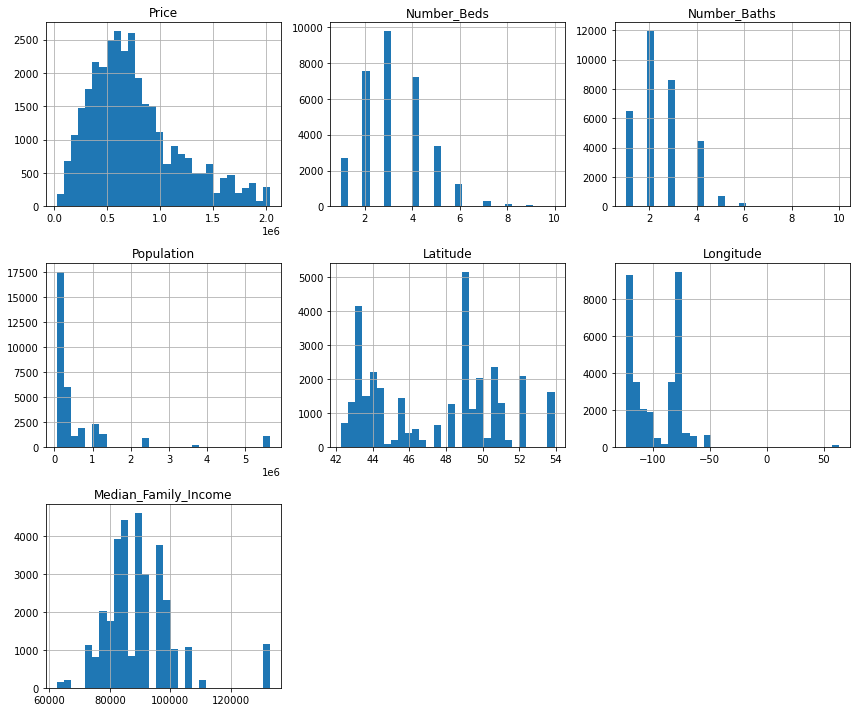

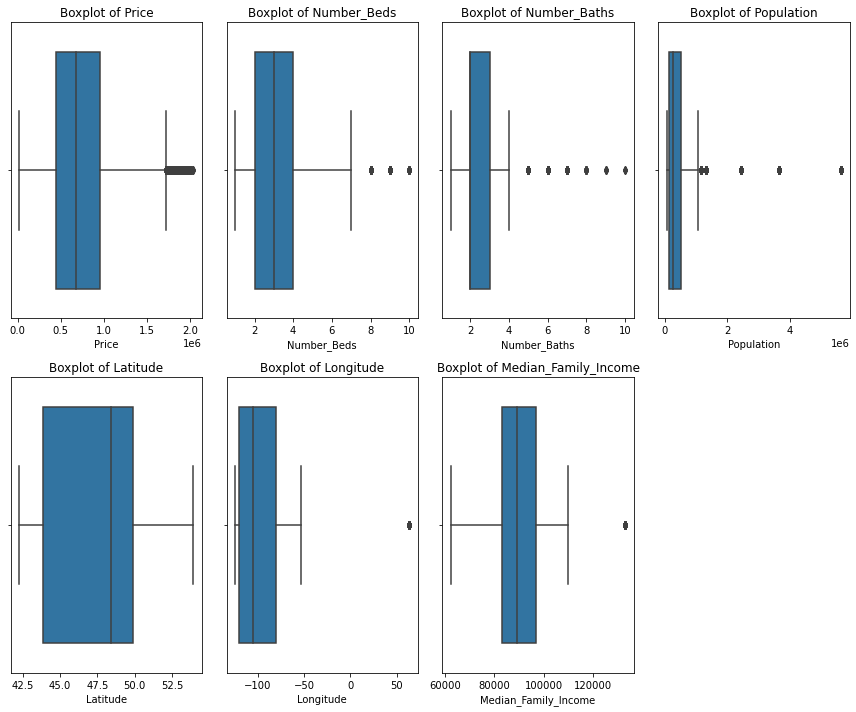

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_cols = ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']
df3[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Plot boxplots to visualize outliers for numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df3[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [49]:
# Check for missing values in the dataset
missing_data = df3.isnull().sum()
print("Missing data count for each column:")
print(missing_data)


Missing data count for each column:
City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64


In [52]:
# Checking for outliers in DF4 using IQR method
def detect_outliers(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Store outlier information
        outlier_info[column] = outliers[column]

    return outlier_info

# Detecting outliers in DF4
outliers_df4 = detect_outliers(df4)

# Displaying the outliers detected
for column, outliers in outliers_df4.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print("-" * 50)


Outliers in 'Price':
Series([], Name: Price, dtype: float64)
--------------------------------------------------
Outliers in 'Number_Beds':
Series([], Name: Number_Beds, dtype: int64)
--------------------------------------------------
Outliers in 'Number_Baths':
Series([], Name: Number_Baths, dtype: float64)
--------------------------------------------------
Outliers in 'Population':
Series([], Name: Population, dtype: float64)
--------------------------------------------------
Outliers in 'Latitude':
Series([], Name: Latitude, dtype: float64)
--------------------------------------------------
Outliers in 'Longitude':
Series([], Name: Longitude, dtype: float64)
--------------------------------------------------
Outliers in 'Median_Family_Income':
Series([], Name: Median_Family_Income, dtype: float64)
--------------------------------------------------


In [53]:
# Checking for outliers in DF4 using IQR method
def detect_outliers(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Store outlier information
        outlier_info[column] = outliers[column]

    return outlier_info

# Detecting outliers in DF4
outliers_df4 = detect_outliers(df4)

# Displaying the outliers detected
for column, outliers in outliers_df4.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print("-" * 50)


Outliers in 'rentfaster_id':
7         92670
8         92670
9         92670
10        92670
17       111264
          ...  
14359     41174
14379     43499
14380     43499
14381     91277
14382     91277
Name: rentfaster_id, Length: 1145, dtype: int64
--------------------------------------------------
Outliers in 'latitude':
16127    62.451510
16128    62.449863
16129    62.449863
16130    62.450907
16131    62.450907
16132    62.448667
16133    62.448667
16134    62.448667
16135    62.450969
16136    62.444180
16137    62.449544
16138    62.449116
16139    62.448712
16140    62.447850
16141    62.448418
16142    62.454102
16143    62.449469
16144    62.444914
16145    62.449001
16146    62.459246
Name: latitude, dtype: float64
--------------------------------------------------
Outliers in 'longitude':
Series([], Name: longitude, dtype: float64)
--------------------------------------------------
Outliers in 'price':
9         4520.0
88        4000.0
129       5500.0
223      11200.0
2

In [54]:
# Function to remove outliers in DF4
def remove_outliers(df, outliers_info):
    # Removing rows with outliers
    for column, outliers in outliers_info.items():
        # Remove rows where the value of the column is an outlier
        df = df[~df[column].isin(outliers)]
    return df

# Remove the outliers from DF4
cleaned_df4 = remove_outliers(df4, outliers_df4)

# Display the summary of the cleaned data
print(cleaned_df4.describe())


       rentfaster_id      latitude     longitude         price
count   23507.000000  23507.000000  23507.000000  23507.000000
mean   490244.840898     48.863801    -99.914969   2073.385995
std     87454.329035      3.629313     17.985816    663.847346
min    250647.000000     40.741802   -128.661880    180.000000
25%    435729.000000     45.417980   -114.071927   1600.000000
50%    527423.000000     50.888804   -113.499423   2010.000000
75%    564453.000000     51.115992    -79.399000   2500.000000
max    572635.000000     58.810762    -52.695472   3975.000000


In [56]:
# Function to remove outliers in DF4
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate the IQR for numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows where the column values are outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers in DF4
df4_cleaned = remove_outliers(df4)

# Display the cleaned data summary
print(df4_cleaned.describe())


       rentfaster_id      latitude     longitude         price
count   23507.000000  23507.000000  23507.000000  23507.000000
mean   490244.840898     48.863801    -99.914969   2073.385995
std     87454.329035      3.629313     17.985816    663.847346
min    250647.000000     40.741802   -128.661880    180.000000
25%    435729.000000     45.417980   -114.071927   1600.000000
50%    527423.000000     50.888804   -113.499423   2010.000000
75%    564453.000000     51.115992    -79.399000   2500.000000
max    572635.000000     58.810762    -52.695472   3975.000000


In [57]:
# Function to remove outliers in DF4
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate the IQR for numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows where the column values are outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers in DF4
df4_cleaned = remove_outliers(df4)

# Display the cleaned data summary
print(df4_cleaned.describe())


       rentfaster_id      latitude     longitude         price
count   23507.000000  23507.000000  23507.000000  23507.000000
mean   490244.840898     48.863801    -99.914969   2073.385995
std     87454.329035      3.629313     17.985816    663.847346
min    250647.000000     40.741802   -128.661880    180.000000
25%    435729.000000     45.417980   -114.071927   1600.000000
50%    527423.000000     50.888804   -113.499423   2010.000000
75%    564453.000000     51.115992    -79.399000   2500.000000
max    572635.000000     58.810762    -52.695472   3975.000000


In [62]:
# Function to detect outliers in DF4 after cleaning
def detect_outliers(df):
    outliers_info = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate the IQR for numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Store outliers for each column
        outliers_info[column] = outliers[column]

    return outliers_info

# Detect outliers in cleaned DF4
outliers_df4_cleaned = detect_outliers(df4_cleaned)

# Print the outliers for each column after cleaning
for column, outliers in outliers_df4_cleaned.items():
    print(f"Outliers in '{column}':")
    print(outliers)
    print("-" * 50)


Outliers in 'rentfaster_id':
7         92670
8         92670
9         92670
10        92670
17       111264
          ...  
14359     41174
14379     43499
14380     43499
14381     91277
14382     91277
Name: rentfaster_id, Length: 1137, dtype: int64
--------------------------------------------------
Outliers in 'latitude':
16127    62.451510
16128    62.449863
16129    62.449863
16130    62.450907
16131    62.450907
16132    62.448667
16133    62.448667
16134    62.448667
16135    62.450969
16136    62.444180
16137    62.449544
16138    62.449116
16139    62.448712
16140    62.447850
16141    62.448418
16142    62.454102
16143    62.449469
16144    62.444914
16145    62.449001
16146    62.459246
Name: latitude, dtype: float64
--------------------------------------------------
Outliers in 'longitude':
Series([], Name: longitude, dtype: float64)
--------------------------------------------------
Outliers in 'price':
9        4520.0
88       4000.0
225      5000.0
280      4630.0
282  

In [63]:
# Remove rows where 'Price' is an outlier using IQR method (or any method you prefer)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers in 'price' and 'latitude'
df4_cleaned = remove_outliers_iqr(df4, 'price')
df4_cleaned = remove_outliers_iqr(df4_cleaned, 'latitude')

# Remove outliers in 'rentfaster_id' (if necessary, but usually ID columns are ignored for outlier analysis)
df4_cleaned = df4_cleaned[df4_cleaned['rentfaster_id'].isin(df4_cleaned['rentfaster_id'].unique())]

print("Cleaned Data Summary after removing outliers:")
print(df4_cleaned.describe())


Cleaned Data Summary after removing outliers:
       rentfaster_id      latitude     longitude        price
count   24635.000000  24635.000000  24635.000000  24635.00000
mean   471581.967648     48.963690   -100.563496   2072.33126
std    121051.687884      3.574482     17.816910    662.35198
min       820.000000     40.741802   -128.661880    180.00000
25%    415753.500000     45.428846   -114.074441   1600.00000
50%    522379.000000     50.918671   -113.516315   2000.00000
75%    563292.000000     51.107212    -79.420433   2500.00000
max    572635.000000     58.810762    -52.695472   3975.00000


In [64]:
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
    return outliers

# Detect outliers in the cleaned df4 data
outliers_after_cleaning = detect_outliers(df4_cleaned)

# Print the outliers after cleaning
for column, outlier_values in outliers_after_cleaning.items():
    if outlier_values.empty:
        print(f"No outliers in '{column}'")
    else:
        print(f"Outliers in '{column}':")
        print(outlier_values)
        print("-" * 50)


Outliers in 'rentfaster_id':
7         92670
8         92670
10        92670
17       111264
18       111264
          ...  
14359     41174
14379     43499
14380     43499
14381     91277
14382     91277
Name: rentfaster_id, Length: 1128, dtype: int64
--------------------------------------------------
No outliers in 'latitude'
No outliers in 'longitude'
Outliers in 'price':
443      3861.0
679      3900.0
1425      180.0
1527      200.0
1614     3906.0
          ...  
23549    3900.0
24177    3965.0
24461    3875.0
24517    3870.0
24518    3870.0
Name: price, Length: 152, dtype: float64
--------------------------------------------------


In [65]:
import numpy as np

# Function to detect outliers using IQR method, excluding 'rentfaster_id' and customizing thresholds for 'price'
def detect_outliers(df):
    outliers = {}
    
    # Exclude non-numerical columns like 'rentfaster_id' from outlier detection
    for column in df.select_dtypes(include=[np.number]).columns:
        # Skip 'rentfaster_id' as it's an ID column
        if column == 'rentfaster_id':
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    # Apply custom logic for 'price' column, considering a reasonable threshold (e.g., min 180, max 3975)
    price_outliers = df[(df['price'] < 180) | (df['price'] > 3975)]
    if not price_outliers.empty:
        outliers['price'] = price_outliers['price']
    
    return outliers

# Detect outliers in the cleaned df4 data
outliers_after_cleaning = detect_outliers(df4_cleaned)

# Print the outliers after cleaning
for column, outlier_values in outliers_after_cleaning.items():
    if outlier_values.empty:
        print(f"No outliers in '{column}'")
    else:
        print(f"Outliers in '{column}':")
        print(outlier_values)
        print("-" * 50)


No outliers in 'latitude'
No outliers in 'longitude'
Outliers in 'price':
443      3861.0
679      3900.0
1425      180.0
1527      200.0
1614     3906.0
          ...  
23549    3900.0
24177    3965.0
24461    3875.0
24517    3870.0
24518    3870.0
Name: price, Length: 152, dtype: float64
--------------------------------------------------


In [66]:
import numpy as np

# Function to perform data quality checks for df1
def quality_check(df1):
    print("Data Quality Check Summary for df1:")
    print("-" * 40)
    
    # 1. Check for null values
    print("1. Checking for Null Values:")
    null_counts = df1.isnull().sum()
    print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values")
    print("-" * 40)
    
    # 2. Check data types
    print("2. Checking Data Types:")
    print(df1.dtypes)
    print("-" * 40)
    
    # 3. Check for duplicate rows
    print("3. Checking for Duplicate Rows:")
    duplicates = df1.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    print("-" * 40)
    
    # 4. Check for outliers (basic sanity check)
    print("4. Checking for Outliers in Numerical Columns:")
    for column in df1.select_dtypes(include=[np.number]).columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
        print(f"{column}: {len(outliers)} outliers")
    print("-" * 40)
    
    # 5. Basic summary statistics
    print("5. Summary Statistics:")
    print(df1.describe())
    print("-" * 40)

# Perform the quality check on df1
quality_check(df1)


Data Quality Check Summary for df1:
----------------------------------------
1. Checking for Null Values:
No missing values
----------------------------------------
2. Checking Data Types:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
----------------------------------------
3. Checking for Duplicate Rows:
Number of duplicate rows: 0
----------------------------------------
4. Checking for Outliers in Numerical Columns:
id: 0 outliers
price: 1146 outliers
bedrooms: 533 outliers
bathrooms: 561 outliers


In [67]:
# Function to handle outliers by capping
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# List of columns to process
columns_with_outliers = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
    'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated',
    'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

# Apply the function to each column
for column in columns_with_outliers:
    handle_outliers(df1, column)

# Recheck for outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

# Print remaining outliers
for column in columns_with_outliers:
    outliers = detect_outliers(df1, column)
    print(f"{column}: {len(outliers)} outliers")


price: 0 outliers
bedrooms: 0 outliers
bathrooms: 0 outliers
sqft_living: 0 outliers
sqft_lot: 0 outliers
waterfront: 0 outliers
view: 0 outliers
condition: 0 outliers
grade: 0 outliers
sqft_above: 0 outliers
sqft_basement: 0 outliers
yr_renovated: 0 outliers
lat: 0 outliers
long: 0 outliers
sqft_living15: 0 outliers
sqft_lot15: 0 outliers


In [68]:
import numpy as np

# Function to perform data quality checks for df2
def quality_check(df2):
    print("Data Quality Check Summary for df2:")
    print("-" * 40)
    
    # 1. Check for null values
    print("1. Checking for Null Values:")
    null_counts = df2.isnull().sum()
    print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values")
    print("-" * 40)
    
    # 2. Check data types
    print("2. Checking Data Types:")
    print(df2.dtypes)
    print("-" * 40)
    
    # 3. Check for duplicate rows
    print("3. Checking for Duplicate Rows:")
    duplicates = df2.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    print("-" * 40)
    
    # 4. Check for outliers (basic sanity check)
    print("4. Checking for Outliers in Numerical Columns:")
    for column in df2.select_dtypes(include=[np.number]).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
        print(f"{column}: {len(outliers)} outliers")
    print("-" * 40)
    
    # 5. Basic summary statistics
    print("5. Summary Statistics:")
    print(df2.describe())
    print("-" * 40)

# Perform the quality check on df2
quality_check(df2)


Data Quality Check Summary for df2:
----------------------------------------
1. Checking for Null Values:
No missing values
----------------------------------------
2. Checking Data Types:
Title                      object
Price($)                  float64
Address                    object
Date Posted                object
Building Type              object
Bedrooms                   object
Bathrooms                  object
Wi-Fi and More             object
Parking Included           object
Agreement Type             object
Pet Friendly               object
Size (sqft)                object
Furnished                  object
Air Conditioning           object
Personal Outdoor Space     object
Smoking Permitted          object
Description                object
url                        object
dtype: object
----------------------------------------
3. Checking for Duplicate Rows:
Number of duplicate rows: 537
----------------------------------------
4. Checking for Outliers in Numerical Col

In [69]:
# Remove duplicate rows
df2 = df2.drop_duplicates()

# Verify if duplicates are removed
duplicates = df2.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates}")


Number of duplicate rows after removal: 0


In [71]:
# Function to impute outliers with median
def impute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])
    return df

# Impute outliers in the 'Price' column with the median
df2 = impute_outliers(df2, 'Price($)')

# Verify if outliers are imputed
print(f"Remaining outliers in 'Price($)' after imputation: {df2[df2['Price($)'] > df2['Price($)'].quantile(0.75) + 1.5 * (df2['Price($)'].quantile(0.75) - df2['Price($)'].quantile(0.25))].shape[0]}")


Remaining outliers in 'Price($)' after imputation: 0


In [74]:
Q1 = df2['Price($)'].quantile(0.25)
Q3 = df2['Price($)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df2[(df2['Price($)'] < lower_bound) | (df2['Price($)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

# 5. Basic summary statistics
print("5. Summary Statistics:")
print(df2.describe())
print("-" * 40)


Number of outliers: 0
5. Summary Statistics:
          Price($)
count  3569.000000
mean   2068.440645
std     737.214617
min     419.300000
25%    1600.000000
50%    2195.000000
75%    2605.813506
max    4100.000000
----------------------------------------


In [6]:
import numpy as np

# Function to perform data quality checks for df3
def quality_check(df3):
    print("Data Quality Check Summary for df3:")
    print("-" * 40)
    
    # 1. Check for null values
    print("1. Checking for Null Values:")
    null_counts = df3.isnull().sum()
    print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values")
    print("-" * 40)
    
    # 2. Check data types
    print("2. Checking Data Types:")
    print(df3.dtypes)
    print("-" * 40)
    
    # 3. Check for duplicate rows
    print("3. Checking for Duplicate Rows:")
    duplicates = df3.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    print("-" * 40)
    
    # 4. Check for outliers (basic sanity check)
    print("4. Checking for Outliers in Numerical Columns:")
    for column in df3.select_dtypes(include=[np.number]).columns:
        Q1 = df3[column].quantile(0.25)
        Q3 = df3[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df3[(df3[column] < lower_bound) | (df3[column] > upper_bound)]
        print(f"{column}: {len(outliers)} outliers")
    print("-" * 40)
    
    # 5. Basic summary statistics
    print("5. Summary Statistics:")
    print(df3.describe())
    print("-" * 40)

# Perform the quality check on df3
quality_check(df3)

 


NameError: name 'df3' is not defined

In [10]:
import pandas as pd
df3 = pd.read_csv('cleaned_file3.csv')
print(df3.head())

      City      Price                  Address  Number_Beds  Number_Baths  \
0  Toronto   779900.0    #318 -20 SOUTHPORT ST            3             2   
1  Toronto   799999.0    #818 -60 SOUTHPORT ST            3             1   
2  Toronto   799900.0  #714 -859 THE QUEENSWAY            2             2   
3  Toronto  1200000.0         275 MORTIMER AVE            4             2   
4  Toronto   668800.0    #420 -388 RICHMOND ST            1             1   

  Province  Population  Latitude  Longitude  Median_Family_Income  
0  Ontario     5647656   43.7417   -79.3733               97000.0  
1  Ontario     5647656   43.7417   -79.3733               97000.0  
2  Ontario     5647656   43.7417   -79.3733               97000.0  
3  Ontario     5647656   43.7417   -79.3733               97000.0  
4  Ontario     5647656   43.7417   -79.3733               97000.0  


In [11]:
# Function to perform data quality checks for df3
def quality_check(df3):
    print("Data Quality Check Summary for df3:")
    print("-" * 40)
    
    # 1. Check for null values
    print("1. Checking for Null Values:")
    null_counts = df3.isnull().sum()
    print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values")
    print("-" * 40)
    
    # 2. Check data types
    print("2. Checking Data Types:")
    print(df3.dtypes)
    print("-" * 40)
    
    # 3. Check for duplicate rows
    print("3. Checking for Duplicate Rows:")
    duplicates = df3.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    print("-" * 40)
    
    # 4. Check for outliers (basic sanity check)
    print("4. Checking for Outliers in Numerical Columns:")
    for column in df3.select_dtypes(include=[np.number]).columns:
        Q1 = df3[column].quantile(0.25)
        Q3 = df3[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df3[(df3[column] < lower_bound) | (df3[column] > upper_bound)]
        print(f"{column}: {len(outliers)} outliers")
    print("-" * 40)
    
    # 5. Basic summary statistics
    print("5. Summary Statistics:")
    print(df3.describe())
    print("-" * 40)

# Perform the quality check on df3
quality_check(df3)

Data Quality Check Summary for df3:
----------------------------------------
1. Checking for Null Values:
No missing values
----------------------------------------
2. Checking Data Types:
City                     object
Price                   float64
Address                  object
Number_Beds               int64
Number_Baths              int64
Province                 object
Population                int64
Latitude                float64
Longitude               float64
Median_Family_Income    float64
dtype: object
----------------------------------------
3. Checking for Duplicate Rows:
Number of duplicate rows: 2516
----------------------------------------
4. Checking for Outliers in Numerical Columns:
Price: 2470 outliers
Number_Beds: 445 outliers
Number_Baths: 2670 outliers
Population: 5489 outliers
Latitude: 0 outliers
Longitude: 91 outliers
Median_Family_Income: 1336 outliers
----------------------------------------
5. Summary Statistics:
              Price   Number_Beds  Numbe

In [13]:
# Remove duplicate rows
df3 = df3.drop_duplicates()

# Verify if duplicates are removed
duplicates = df3.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates}")

Number of duplicate rows after removal: 0


In [14]:
import numpy as np

# Function to handle outliers by capping
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# List of columns with outliers based on your results
columns_with_outliers = [
    'Price', 'Number_Beds', 'Number_Baths', 'Population', 
    'Latitude', 'Longitude', 'Median_Family_Income'
]

# Apply the function to handle outliers for each column
for column in columns_with_outliers:
    handle_outliers(df3, column)

# Recheck for outliers in the columns
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

# Print remaining outliers for each column
for column in columns_with_outliers:
    outliers = detect_outliers(df3, column)
    print(f"{column}: {len(outliers)} outliers")


Price: 0 outliers
Number_Beds: 0 outliers
Number_Baths: 0 outliers
Population: 0 outliers
Latitude: 0 outliers
Longitude: 0 outliers
Median_Family_Income: 0 outliers


In [23]:
import numpy as np

# Function to handle erroneous data
def clean_data(df3):
    print("Data Cleaning for df3:")
    print("-" * 40)
    
    # 1. Handling Number_Beds and Number_Baths (Remove or replace 0 values)
    print("1. Handling Number_Beds and Number_Baths:")
    df3['Number_Beds'] = df3['Number_Beds'].replace(0, np.nan)  # Replace 0 with NaN
    df3['Number_Baths'] = df3['Number_Baths'].replace(0, np.nan)  # Replace 0 with NaN
    print("Handled 0 values in 'Number_Beds' and 'Number_Baths'")
    print("-" * 40)
    
    # 2. Handling Price (Capping extreme values)
    print("2. Handling Price outliers:")
    Q1 = df3['Price'].quantile(0.25)
    Q3 = df3['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df3['Price'] = df3['Price'].clip(lower=lower_bound, upper=upper_bound)  # Cap extreme values
    print("Capped extreme values in 'Price'")
    print("-" * 40)
    
    # 3. Handling Latitude and Longitude (Ensure they fall within valid ranges)
    print("3. Handling Latitude and Longitude:")
    df3['Latitude'] = df3['Latitude'].clip(lower=-90, upper=90)  # Ensure Latitude is within -90 to 90
    df3['Longitude'] = df3['Longitude'].clip(lower=-180, upper=180)  # Ensure Longitude is within -180 to 180
    print("Ensured valid ranges for 'Latitude' and 'Longitude'")
    print("-" * 40)
    
    # 4. Handling Median_Family_Income (Check extreme values)
    print("4. Handling Median_Family_Income:")
    max_income = df3['Median_Family_Income'].max()
    if max_income > 120000:  # If income exceeds a reasonable max value, cap it
        df3['Median_Family_Income'] = df3['Median_Family_Income'].clip(upper=120000)
    print("Capped extreme values in 'Median_Family_Income'")
    print("-" * 40)
    
    # 5. Checking for remaining null values and filling them if necessary
    print("5. Handling missing values:")
    df3 = df3.fillna(df3.mean())  # Replace NaN with mean for numerical columns
    print("Handled missing values by replacing NaN with mean")
    print("-" * 40)
    
    return df3

# Apply data cleaning
df3_cleaned = clean_data(df3)

# Recheck summary statistics after cleaning
print("Summary Statistics After Cleaning:")
print(df3_cleaned.describe())


Data Cleaning for df3:
----------------------------------------
1. Handling Number_Beds and Number_Baths:
Handled 0 values in 'Number_Beds' and 'Number_Baths'
----------------------------------------
2. Handling Price outliers:
Capped extreme values in 'Price'
----------------------------------------
3. Handling Latitude and Longitude:
Ensured valid ranges for 'Latitude' and 'Longitude'
----------------------------------------
4. Handling Median_Family_Income:
Capped extreme values in 'Median_Family_Income'
----------------------------------------
5. Handling missing values:
Handled missing values by replacing NaN with mean
----------------------------------------
Summary Statistics After Cleaning:
              Price   Number_Beds  Number_Baths    Population      Latitude  \
count  3.325200e+04  33252.000000  33252.000000  3.325200e+04  33252.000000   
mean   8.687492e+05      3.320808      2.478693  4.663049e+05     47.272550   
std    5.292167e+05      1.394675      1.090512  4.9351

In [24]:
df3.to_pickle('df3_cleaned.pkl')

In [25]:
import os

# List files in the current directory
print(os.listdir())

['-1.14-windows.xml', '.android', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.m2', '.matplotlib', '.ms-ad', '.p2', '.packettracer', '.python_history', '.redhat', '.spyder-py3', '.vscode', '3D Objects', 'abc.txt', 'advertising.csv', 'anaconda3', 'AndroidStudioProjects', 'AppData', 'Apple', 'Application Data', 'argv[1].txt', 'banglore_home_prices_model.pickle', 'BullseyeCoverageError.txt', 'Cisco Packet Tracer 8.0', 'Cisco Packet Tracer 8.0.1', 'cleaned_df1.csv', 'cleaned_file1.csv', 'cleaned_file2.csv', 'cleaned_file3.csv', 'cleaned_file4.csv', 'cleaned_file5.csv', 'cleaned_file6.csv', 'CLGDATA.csv', 'CLGDATA.xlsx', 'client.class', 'client.java', 'confusion.png', 'Contacts', 'contclient.java', 'Cookies', 'covid.csv', 'DATA.csv', 'decisionTree_Data.csv', 'df1_cleaned.pkl', 'df3_cleaned.pkl', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'Favorites'

In [26]:
# Check if the specific files you saved exist
import os

# List files in the current directory and check if your files are there
print([f for f in os.listdir() if f.startswith('df')])


['df1_cleaned.pkl', 'df3_cleaned.pkl']


In [6]:
import pandas as pd

# Load the cleaned DataFrame
df1_cleaned = pd.read_pickle("df1_cleaned.pkl")

# Display the first few rows to confirm successful loading
print("First few rows of df1_cleaned:")
print(df1_cleaned.head())

# Perform cleanliness checks
print("\n--- Cleanliness Check for df1_cleaned ---")

# Check for missing values
print("\nMissing values:")
print(df1_cleaned.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:", df1_cleaned.duplicated().sum())

# Check data types of columns
print("\nData types:")
print(df1_cleaned.dtypes)

# Statistical summary
print("\nStatistical summary:")
print(df1_cleaned.describe(include='all'))  # Include all column types

# Check column names
print("\nColumn names:")
print(df1_cleaned.columns)

# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
for col in df1_cleaned.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {df1_cleaned[col].unique()}")

# Check range of numeric columns
print("\nValue ranges for numeric columns:")
for col in df1_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: {df1_cleaned[col].min()} to {df1_cleaned[col].max()}")


First few rows of df1_cleaned:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_ren

In [7]:
# Check if df1_cleaned is ready for the next step
def check_readiness(df):
    issues = []

    # Check for missing values
    if df.isnull().sum().sum() > 0:
        issues.append("Missing values detected.")
    
    # Check for duplicate rows
    if df.duplicated().sum() > 0:
        issues.append("Duplicate rows detected.")
    
    # Check column data types
    invalid_dtypes = {}
    for col in df.columns:
        if df[col].dtype == "object" and not df[col].dropna().apply(lambda x: isinstance(x, str)).all():
            invalid_dtypes[col] = "Non-string data in object column"
        if df[col].dtype == "int64" and not pd.api.types.is_integer_dtype(df[col]):
            invalid_dtypes[col] = "Non-integer data in integer column"
        if df[col].dtype == "float64" and not pd.api.types.is_float_dtype(df[col]):
            invalid_dtypes[col] = "Non-float data in float column"
    
    if invalid_dtypes:
        issues.append(f"Invalid data types detected: {invalid_dtypes}")
    
    # Example: Check numeric ranges (replace with your expected ranges)
    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        if df[col].min() < 0:  # Replace 0 with your actual lower limit if needed
            issues.append(f"Values in column {col} fall below the expected range.")
    
    # Example: Check categorical columns for unexpected values
    for col in df.select_dtypes(include=["object", "category"]).columns:
        unique_values = df[col].unique()
        print(f"Unique values for {col}: {unique_values}")  # Optionally validate manually
    
    # Check for column names
    expected_columns = ['col1', 'col2', 'col3']  # Replace with actual expected columns
    missing_columns = set(expected_columns) - set(df.columns)
    if missing_columns:
        issues.append(f"Missing columns: {missing_columns}")

    # Report issues or confirm readiness
    if not issues:
        print("Data is ready for the next step!")
    else:
        print("Data is NOT ready. Issues found:")
        for issue in issues:
            print(f"- {issue}")

# Run the readiness check on df1_cleaned
check_readiness(df1_cleaned)


Unique values for date: ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '20150407T000000' '20140827T000000'
 '20150223T000000' '2014121

In [9]:
# Correction for 'long' column
min_long_value = 0  # Replace with the actual minimum acceptable value for 'long'
df1_cleaned.loc[df1_cleaned['long'] < min_long_value, 'long'] = min_long_value

# Confirm correction for 'long' column
print("\nUpdated range for 'long' column:")
print(df1_cleaned['long'].min(), "to", df1_cleaned['long'].max())

# Add missing columns
expected_columns = ['col1', 'col2', 'col3']  # Replace with actual expected columns
for col in expected_columns:
    if col not in df1_cleaned.columns:
        df1_cleaned[col] = None  # Use None, NaN, 0, or '' based on your requirement

# Confirm addition of missing columns
print("\nUpdated column names:")
print(df1_cleaned.columns)

# Save the corrected DataFrame (optional)
df1_cleaned.to_pickle("df1_corrected.pkl")

print("\nData corrections applied successfully!")





Updated range for 'long' column:
0.0 to 0.0

Updated column names:
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'col1', 'col2', 'col3'],
      dtype='object')

Data corrections applied successfully!
Unique values for date: ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' 

In [11]:
# Fill missing values with a default value
# For numeric columns, fill with the column mean or a constant value
df1_cleaned.fillna(df1_cleaned.mean(), inplace=True)  # Fill numeric columns with mean

# For categorical columns, fill with a placeholder value (e.g., 'Unknown')
df1_cleaned.fillna('Unknown', inplace=True)  # Fill categorical columns with 'Unknown'

# Check if missing values have been filled
print("\nMissing values after filling:")
print(df1_cleaned.isnull().sum())

# Run the readiness check again on the corrected df1_cleaned
check_readiness(df1_cleaned)


Missing values after filling:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
col1             0
col2             0
col3             0
dtype: int64
Unique values for date: ['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '

In [12]:
# Check if columns are categorical
categorical_columns = ['col1', 'col2', 'col3']  # List your columns to check

# Identify non-categorical columns that have 'Unknown'
for col in categorical_columns:
    if df1_cleaned[col].dtype == 'object' or df1_cleaned[col].dtype.name == 'category':
        print(f"Column {col} is categorical.")
    else:
        print(f"Column {col} is NOT categorical.")

# Replace 'Unknown' values if the column is not categorical
for col in categorical_columns:
    if df1_cleaned[col].dtype != 'object' and df1_cleaned[col].dtype.name != 'category':
        # Example: Replace 'Unknown' in non-categorical columns with the column's mean (if numeric)
        if df1_cleaned[col].dtype in ['int64', 'float64']:
            df1_cleaned[col].replace('Unknown', df1_cleaned[col].mean(), inplace=True)
        else:
            # For non-numeric columns, you could choose to replace with 'NaN' or some other value
            df1_cleaned[col].replace('Unknown', None, inplace=True)

# Check for the updated unique values
print("\nUpdated unique values:")
for col in categorical_columns:
    print(f"Unique values for {col}: {df1_cleaned[col].unique()}")


Column col1 is categorical.
Column col2 is categorical.
Column col3 is categorical.

Updated unique values:
Unique values for col1: ['Unknown']
Unique values for col2: ['Unknown']
Unique values for col3: ['Unknown']


In [13]:
# Save the cleaned DataFrame to a pickle file
df1_cleaned.to_pickle("df1_cleaned_final.pkl")

print("File saved as 'df1_cleaned_final.pkl'.")


File saved as 'df1_cleaned_final.pkl'.


In [15]:
# Check the columns in df3_cleaned
print("Columns in df3_cleaned:")
print(df3_cleaned.columns)

# Check for missing or unexpected values
# Check unique values for 'long' (if you meant to check a specific column)
if 'long' in df3_cleaned.columns:
    print("\nChecking 'long' column:")
    print(df3_cleaned['long'].describe())

# Example: If there's a different column related to 'long' (like 'longitude', 'long_value', etc.)
# You can inspect that column as well


Columns in df3_cleaned:
Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')


In [16]:
# Check for missing values
print("\nMissing values in df3:")
print(df3_cleaned.isnull().sum())

# Check for any invalid data or out-of-range values (e.g., numeric columns)
# You can define rules specific to your columns (e.g., range for numeric columns)
# Example: If 'Longitude' should be within a valid geographic range (-180 to 180)
min_longitude = -180  # Minimum valid value for longitude
max_longitude = 180   # Maximum valid value for longitude

# Check 'Longitude' column for invalid data
df3_cleaned.loc[(df3_cleaned['Longitude'] < min_longitude) | (df3_cleaned['Longitude'] > max_longitude), 'Longitude'] = None  # Or replace with a valid value

# Handle missing values:
# For numeric columns, fill with the mean; for categorical columns, fill with 'Unknown'
categorical_columns_df3 = ['City', 'Address', 'Province']  # Categorical columns
numeric_columns_df3 = ['Price', 'Number_Beds', 'Number_Baths', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income']  # Numeric columns

# Handle categorical columns (replace NaN with 'Unknown')
for col in categorical_columns_df3:
    df3_cleaned[col].fillna('Unknown', inplace=True)

# Handle numeric columns (replace NaN with the mean)
for col in numeric_columns_df3:
    df3_cleaned[col].fillna(df3_cleaned[col].mean(), inplace=True)

# Check if missing values are filled
print("\nMissing values after filling:")
print(df3_cleaned.isnull().sum())

# Check unique values in categorical columns to ensure no 'Unknown' values if unwanted
for col in categorical_columns_df3:
    print(f"Unique values for {col}: {df3_cleaned[col].unique()}")

# Save the cleaned DataFrame
df3_cleaned.to_pickle("df3_cleaned_final.pkl")

print("\ndf3 cleaned and saved as 'df3_cleaned_final.pkl'.")



Missing values in df3:
City                      0
Price                     0
Address                   0
Number_Beds             625
Number_Baths              0
Province                  0
Population                0
Latitude                  0
Longitude                 0
Median_Family_Income      0
dtype: int64

Missing values after filling:
City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64
Unique values for City: ['Toronto' 'Vancouver' 'Calgary' 'Edmonton' 'Ottawa' 'Winnipeg' 'Hamilton'
 'Kitchener' 'London' 'St. Catharines' 'Oshawa' 'Victoria' 'Windsor'
 'Saskatoon' 'Regina' "St. John's" 'Barrie' 'Kelowna' 'Abbotsford'
 'Sudbury' 'Kingston' 'Guelph' 'Moncton' 'Brantford' 'Thunder Bay'
 'Saint John' 'Peterborough' 'Red Deer' 'Kamloops' 'Nanaimo' 'Lethbridge'
 'W

In [17]:
# Check for missing values
missing_values = df3_cleaned.isnull().sum()
print("\nMissing values in df3_cleaned after cleaning:")
print(missing_values)

# Check for invalid or out-of-range values (e.g., Longitude range check)
invalid_values = df3_cleaned[(df3_cleaned['Longitude'] < -180) | (df3_cleaned['Longitude'] > 180)]
print("\nInvalid Longitude values:")
print(invalid_values)

# Check unique values for categorical columns to ensure no 'Unknown' values (unless expected)
categorical_columns_df3 = ['City', 'Address', 'Province']
for col in categorical_columns_df3:
    unique_values = df3_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    if 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")

# Check if any column has an unexpected type or missing data
expected_columns_df3 = ['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
                        'Population', 'Latitude', 'Longitude', 'Median_Family_Income']

# Verify if all expected columns are present
missing_columns = [col for col in expected_columns_df3 if col not in df3_cleaned.columns]
if missing_columns:
    print("\nMissing columns:", missing_columns)
else:
    print("\nAll expected columns are present.")

# Check if data is ready
if missing_values.sum() == 0 and invalid_values.empty and not missing_columns:
    print("\nData is ready for the next step!")
else:
    print("\nData is NOT ready. Issues found:")
    if missing_values.sum() > 0:
        print("- Missing values detected.")
    if not invalid_values.empty:
        print("- Invalid values detected in Longitude.")
    if missing_columns:
        print("- Missing columns detected.")



Missing values in df3_cleaned after cleaning:
City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

Invalid Longitude values:
Empty DataFrame
Columns: [City, Price, Address, Number_Beds, Number_Baths, Province, Population, Latitude, Longitude, Median_Family_Income]
Index: []

Unique values for City: ['Toronto' 'Vancouver' 'Calgary' 'Edmonton' 'Ottawa' 'Winnipeg' 'Hamilton'
 'Kitchener' 'London' 'St. Catharines' 'Oshawa' 'Victoria' 'Windsor'
 'Saskatoon' 'Regina' "St. John's" 'Barrie' 'Kelowna' 'Abbotsford'
 'Sudbury' 'Kingston' 'Guelph' 'Moncton' 'Brantford' 'Thunder Bay'
 'Saint John' 'Peterborough' 'Red Deer' 'Kamloops' 'Nanaimo' 'Lethbridge'
 'White Rock' 'Maple Ridge' 'Prince George' 'Sault Ste. Marie'
 'Medicine Hat' 'New Westminster' 'Caledon' 'Burnaby' 'Airdrie'

In [18]:
df3_cleaned.to_pickle('df3_cleaned_final.pkl')

In [22]:
import pandas as pd

# Load the cleaned_file2.csv
df2_cleaned = pd.read_csv('cleaned_file2.csv')

# Check the columns to identify the correct column names
print("\nColumns in cleaned_file2.csv:")
print(df2_cleaned.columns)

# Check for missing values
missing_values_df2 = df2_cleaned.isnull().sum()
print("\nMissing values in df2_cleaned:")
print(missing_values_df2)

# Check for any invalid or out-of-range values (adjust for correct column)
# Checking the 'Price($)' column for negative values or invalid data
invalid_values_df2 = df2_cleaned[df2_cleaned['Price($)'] < 0]
print("\nInvalid values in 'Price($)' column:")
print(invalid_values_df2)

# Check unique values for categorical columns
categorical_columns_df2 = ['Building Type', 'Agreement Type', 'Pet Friendly', 'Wi-Fi and More', 'Parking Included',
                           'Furnished', 'Air Conditioning', 'Personal Outdoor Space', 'Smoking Permitted']  # List of categorical columns
for col in categorical_columns_df2:
    unique_values = df2_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    if 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")

# Check if data is ready for the next step
if missing_values_df2.sum() == 0 and invalid_values_df2.empty:
    print("\nData is ready for the next step!")
else:
    print("\nData is NOT ready. Issues found:")
    if missing_values_df2.sum() > 0:
        print("- Missing values detected.")
    if not invalid_values_df2.empty:
        print("- Invalid values detected in 'Price($)' or other columns.")



Columns in cleaned_file2.csv:
Index(['Title', 'Price($)', 'Address', 'Date Posted', 'Building Type',
       'Bedrooms', 'Bathrooms', 'Wi-Fi and More', 'Parking Included',
       'Agreement Type', 'Pet Friendly', 'Size (sqft)', 'Furnished',
       'Air Conditioning', 'Personal Outdoor Space', 'Smoking Permitted',
       'Description', 'url'],
      dtype='object')

Missing values in df2_cleaned:
Title                     0
Price($)                  0
Address                   0
Date Posted               0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Description               0
url                       0
dtype: int64

Invalid values in 'Price($)' column:
Empty DataFrame
Columns: [Title, Price($), Add

In [23]:
df2_cleaned.to_pickle('df2_cleaned_final.pkl')

In [30]:
import pandas as pd
import numpy as np  # Import numpy

# Load the cleaned_file4.csv
df4_cleaned = pd.read_csv('cleaned_file4.csv')

# Check the columns to identify the correct column names
print("\nColumns in cleaned_file4.csv:")
print(df4_cleaned.columns)

# Check for missing values
missing_values_df4 = df4_cleaned.isnull().sum()
print("\nMissing values in df4_cleaned:")
print(missing_values_df4)

# Check for any invalid or out-of-range values (e.g., check the 'price' column for negative values)
invalid_values_df4 = df4_cleaned[df4_cleaned['price'] < 0]
print("\nInvalid values in 'price' column:")
print(invalid_values_df4)

# Check unique values for categorical columns
categorical_columns_df4 = ['lease_term', 'type', 'furnishing', 'smoking', 'cats', 'dogs']
for col in categorical_columns_df4:
    unique_values = df4_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    
    # Ensure that unique_values is a numpy array and check for 'Unknown' safely
    if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")

# Check if data is ready for the next step
if missing_values_df4.sum() == 0 and invalid_values_df4.empty:
    print("\nData is ready for the next step!")
else:
    print("\nData is NOT ready. Issues found:")
    if missing_values_df4.sum() > 0:
        print("- Missing values detected.")
    if not invalid_values_df4.empty:
        print("- Invalid values detected in 'price' column.")



Columns in cleaned_file4.csv:
Index(['rentfaster_id', 'city', 'province', 'address', 'latitude', 'longitude',
       'lease_term', 'type', 'price', 'beds', 'baths', 'link', 'furnishing',
       'availability_date', 'smoking', 'cats', 'dogs'],
      dtype='object')

Missing values in df4_cleaned:
rentfaster_id        0
city                 0
province             0
address              0
latitude             0
longitude            0
lease_term           0
type                 0
price                0
beds                 0
baths                0
link                 0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64

Invalid values in 'price' column:
Empty DataFrame
Columns: [rentfaster_id, city, province, address, latitude, longitude, lease_term, type, price, beds, baths, link, furnishing, availability_date, smoking, cats, dogs]
Index: []

Unique values for lease_term: ['Long Term' 'Negotiable' 'Short Term' 

<ipython-input-30-40495146e696>:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:


In [31]:
# Save the cleaned DataFrame to a .pkl file
df4_cleaned.to_pickle('df4_cleaned_final.pkl')




In [34]:
import pandas as pd
import numpy as np  # Import numpy

# Load the cleaned_file5.csv
df5_cleaned = pd.read_csv('cleaned_file5.csv')

# Check the columns to confirm the correct column names
print("\nColumns in cleaned_file5.csv:")
print(df5_cleaned.columns)

# Check for missing values in the dataset
missing_values_df5 = df5_cleaned.isnull().sum()
print("\nMissing values in df5_cleaned:")
print(missing_values_df5)

# Check for invalid or out-of-range values in the 'Price' column
invalid_values_df5 = df5_cleaned[df5_cleaned['Price'] < 0]  # Check for negative values
print(f"\nInvalid values in 'Price' column:")
print(invalid_values_df5)

# Check unique values for categorical columns
categorical_columns_df5 = ['Type', 'Garage', 'City', 'Province']  # Modify this list if needed
for col in categorical_columns_df5:
    unique_values = df5_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    
    # Check if 'Unknown' is present and alert
    if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")

# Check if the data is ready for the next step
if missing_values_df5.sum() == 0 and invalid_values_df5.empty:
    print("\nData is ready for the next step!")
else:
    print("\nData is NOT ready. Issues found:")
    if missing_values_df5.sum() > 0:
        print("- Missing values detected.")
    if not invalid_values_df5.empty:
        print("- Invalid values detected in 'Price' column.")



Columns in cleaned_file5.csv:
Index(['Price', 'Bedrooms', 'Bathrooms', 'SqFt', 'City', 'Province',
       'Year_Built', 'Type', 'Garage', 'Lot_Area'],
      dtype='object')

Missing values in df5_cleaned:
Price         0
Bedrooms      0
Bathrooms     0
SqFt          0
City          0
Province      0
Year_Built    0
Type          0
Garage        0
Lot_Area      0
dtype: int64

Invalid values in 'Price' column:
Empty DataFrame
Columns: [Price, Bedrooms, Bathrooms, SqFt, City, Province, Year_Built, Type, Garage, Lot_Area]
Index: []

Unique values for Type: ['Condo' 'House' 'Apartment']

Unique values for Garage: [1 0]

Unique values for City: ['Montreal' 'Toronto' 'Vancouver' 'Calgary' 'Ottawa']

Unique values for Province: ['BC' 'ON' 'QC' 'AB']

Data is ready for the next step!


<ipython-input-34-81bf8bad8ce2>:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:


In [35]:
df5_cleaned.to_pickle('df5_cleaned_final.pkl')

In [38]:
import pandas as pd
import numpy as np

# Load cleaned_file6.csv
df6_cleaned = pd.read_csv('cleaned_file6.csv')

# Check the columns to confirm the column names
print("\nColumns in cleaned_file6.csv:")
print(df6_cleaned.columns)

# Check for missing values in the dataset
missing_values_df6 = df6_cleaned.isnull().sum()
print("\nMissing values in df6_cleaned:")
print(missing_values_df6)

# Example: Check for invalid values in the 'Population' column (you can change this column name based on your dataset)
population_column = 'Population'  # Replace with the correct column name if different
invalid_values_df6 = df6_cleaned[df6_cleaned[population_column] < 0]  # Check for negative values
print(f"\nInvalid values in '{population_column}' column:")
print(invalid_values_df6)

# Check unique values for categorical columns
categorical_columns_df6 = ['GEO', 'Sex', 'Age group', 'Employment']  # Update this list based on your dataset's categorical columns
for col in categorical_columns_df6:
    unique_values = df6_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    
    # Check if 'Unknown' is present and alert
    if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")

# Check if data is ready for the next step
if missing_values_df6.sum() == 0 and invalid_values_df6.empty:
    print("\nData is ready for the next step!")
else:
    print("\nData is NOT ready. Issues found:")
    if missing_values_df6.sum() > 0:
        print("- Missing values detected.")
    if not invalid_values_df6.empty:
        print(f"- Invalid values detected in '{population_column}' column.")



Columns in cleaned_file6.csv:
Index(['REF_DATE', 'GEO', 'Sex', 'Age group', 'Employment',
       'Full-time employment', 'Labour force', 'Part-time employment ',
       'Population', 'Unemployment', 'Employment rate', 'Participation rate',
       'Unemployment rate'],
      dtype='object')

Missing values in df6_cleaned:
REF_DATE                 0
GEO                      0
Sex                      0
Age group                0
Employment               0
Full-time employment     0
Labour force             0
Part-time employment     0
Population               0
Unemployment             0
Employment rate          0
Participation rate       0
Unemployment rate        0
dtype: int64

Invalid values in 'Population' column:
Empty DataFrame
Columns: [REF_DATE, GEO, Sex, Age group, Employment, Full-time employment, Labour force, Part-time employment , Population, Unemployment, Employment rate, Participation rate, Unemployment rate]
Index: []

Unique values for GEO: ['Alberta' 'British Columbia

<ipython-input-38-79229f9b6339>:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if isinstance(unique_values, np.ndarray) and 'Unknown' in unique_values:


In [39]:
# Check unique values for categorical columns
categorical_columns_df6 = ['GEO', 'Sex', 'Age group', 'Employment']  # Update this list based on your dataset's categorical columns
for col in categorical_columns_df6:
    unique_values = df6_cleaned[col].unique()
    print(f"\nUnique values for {col}: {unique_values}")
    
    # Check if 'Unknown' is present and alert
    if 'Unknown' in unique_values:
        print(f"Warning: 'Unknown' is present in {col}. Consider replacing or handling it.")



Unique values for GEO: ['Alberta' 'British Columbia' 'Canada' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan']

Unique values for Sex: ['Both sexes']

Unique values for Age group: ['15 to 24 years' '15 to 64 years' '15 years and over' '25 to 54 years'
 '25 years and over' '55 years and over' '15 to 19 years' '20 to 24 years'
 '55 to 64 years']

Unique values for Employment: [ 231800.  802400.  819500. ... 2907800.  999600.  589000.]


<ipython-input-39-c159d9232d12>:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Unknown' in unique_values:


In [40]:
df6_cleaned.to_pickle('df6_cleaned_final.pkl')